# Movie Recommendation

## IMDB movie recommendation notebook

#### Author/s: Ruturaj Kiran Vaidya, Brian McClannahan
(Add you name if you edit/improve)

In [1]:
# Imports

# Genral

import pandas as pd
import numpy as np
import random

# graphs

from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Model
# sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [2]:
from matplotlib import pyplot as plt

In [3]:
train = pd.read_json("MovieDetails.json")
test = pd.read_json("TestMovieDetails.json")

In [4]:
train.keys()

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
       'Season', 'Episode', 'seriesID'],
      dtype='object')

In [5]:
test.keys()

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
       'Error', 'Season', 'Episode', 'seriesID'],
      dtype='object')

In [6]:
del test["Error"]

In [7]:
test.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Season,Episode,seriesID
0,The Guardian,2006,PG-13,29 Sep 2006,139 min,"Action, Adventure, Drama",Andrew Davis,Ron L. Brinkerhoff,"Kevin Costner, Ashton Kutcher, Sela Ward, Meli...",A high school swim champion with a troubled pa...,...,movie,23 Jan 2007,"$54,983,983",Buena Vista Pictures,N/A,True,NaN,NaN,NaN,NaN
1,The Dresser,1983,PG,06 Dec 1983,118 min,Drama,Peter Yates,"Ronald Harwood (screenplay), Ronald Harwood (b...","Albert Finney, Tom Courtenay, Edward Fox, Zena...",An effeminate personal assistant of a deterior...,...,movie,06 Apr 2004,N/A,Sony Pictures Entertainment,N/A,True,NaN,NaN,NaN,NaN
2,Lackawanna Blues,2005,PG-13,12 Feb 2005,95 min,"Drama, Music",George C. Wolfe,"Ruben Santiago-Hudson (play), Ruben Santiago-H...","S. Epatha Merkerson, Marcus Carl Franklin, Yas...","In a story fueled by rhythm and blues, a young...",...,movie,23 Aug 2005,N/A,HBO Films,N/A,True,NaN,NaN,NaN,NaN
3,Darling Lili,1970,G,24 Jun 1970,136 min,"Comedy, Drama, Musical, Romance, War",Blake Edwards,"Blake Edwards, William Peter Blatty","Julie Andrews, Rock Hudson, Jeremy Kemp, Lance...","Set during World War I, this movie is a cute s...",...,movie,25 Oct 2005,N/A,Paramount,N/A,True,NaN,NaN,NaN,NaN
4,Acrobatty Bunny,1946,APPROVED,29 Jun 1946,8 min,"Family, Animation, Short",Robert McKimson,Warren Foster (story),Mel Blanc,When the circus arrives they put the lion's ca...,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN


In [8]:
train.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Season,Episode,seriesID
0,Futz,1969,NOT RATED,16 Nov 1969,92 min,Comedy,Tom O'Horgan,"Rochelle Owens (play), Joseph Stefano (screenp...","Seth Allen, John Bakos, Mari-Claire Charba, Pe...",Sexual satire about a young farmer who has had...,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
1,Stanley & Iris,1990,PG-13,09 Feb 1990,104 min,"Drama, Romance",Martin Ritt,"Pat Barker (novel), Harriet Frank Jr. (screenp...","Jane Fonda, Robert De Niro, Swoosie Kurtz, Mar...",A struggling widow falls in love with an illit...,...,movie,13 Jan 2004,N/A,MGM Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
2,Puss in Boots,1988,G,10 Jun 1988,96 min,"Fantasy, Musical, Family",Eugene Marner,"Charles Perrault (fairy tale ""Le chat botté""),...","Christopher Walken, Jason Connery, Carmela Mar...",A cat belonging to a poor miller's son thinks ...,...,movie,09 Aug 2005,N/A,MGM,N/A,True,NaN,NaN,NaN,NaN
3,#DUPE#,1972,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
4,Who Done It?,1949,N/A,03 Mar 1949,16 min,"Comedy, Short",Edward Bernds,"Edward Bernds (story), Edward Bernds (screenplay)","Shemp Howard, Larry Fine, Moe Howard, Christin...",The stooges are private detectives looking for...,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN


In [9]:
combined = pd.concat([train, test], ignore_index=True)
movies = combined[["imdbID", "Title", "Ratings", "imdbRating", "imdbVotes", "Language", "Genre"]].dropna()
movies.drop_duplicates(subset=['imdbID'], keep=False, inplace=True)

In [10]:
movies.tail()

,imdbID,Title,Ratings,imdbRating,imdbVotes,Language,Genre
7029,tt0258760,Lammbock,"[{'Source': 'Internet Movie Database', 'Value'...",7.3,"10,180",German,Comedy
7030,tt0146455,Babylon 5: A Call to Arms,"[{'Source': 'Internet Movie Database', 'Value'...",7.2,"4,976",English,"Action, Adventure, Drama, Sci-Fi"
7031,tt0432047,Sarkar,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,"14,199","Hindi, Marathi","Crime, Drama"
7032,tt0109515,Cyber Tracker,"[{'Source': 'Internet Movie Database', 'Value'...",3.5,971,English,"Action, Sci-Fi"
7033,tt0485161,Totally Awesome,"[{'Source': 'Internet Movie Database', 'Value'...",5.2,"1,625",English,Comedy


In [11]:
movies.shape

(6914, 7)

### Encoding genres

In [12]:
# split genres and printing
genres = set([j for i in [i.split(",") for i in movies['Genre']] for j in i])
print(genres)
print(len(genres))

{' News', ' Music', ' Sci-Fi', 'Musical', 'Music', ' Film-Noir', 'Adult', ' Family', ' Drama', 'Documentary', 'Comedy', 'Drama', 'Fantasy', 'Talk-Show', 'Short', 'Biography', 'Game-Show', ' Comedy', ' Romance', ' Sport', ' Talk-Show', 'Sci-Fi', ' Fantasy', 'Western', ' Biography', 'Thriller', ' Documentary', 'War', ' Horror', ' Crime', 'Family', ' Adult', 'Action', 'Animation', ' Animation', ' War', 'Romance', ' Short', ' Adventure', 'Crime', 'Mystery', ' Action', 'Film-Noir', ' Musical', ' Mystery', ' Thriller', 'Horror', 'Adventure', 'Sport', 'News', 'Reality-TV', ' Reality-TV', ' Western', ' Game-Show', 'History', 'N/A', ' History'}
57


In [13]:
# Add columns based on new generes
genres_dic = {j:[1 if j in i else 0 for i in movies["Genre"]] for j in genres}
# Plotting movies per genre
data = [go.Bar(
            x=list(genres_dic.keys()),
            y=[sum(i) for i in genres_dic.values()]
    )]
fig = go.Figure(data=data)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    title="Movies per Genre",
    xaxis_title="Genres",
    yaxis_title="Number of Movies",
)

iplot(fig)
# There is an N/A genre - removing
del genres_dic['N/A']

### Similarly encoding languages

In [14]:
# split genres and printing
languages = set([j for i in [i.split(",") for i in movies['Language']] for j in i])
print(len(languages))

187


In [15]:
# Add columns based on new generes
languages_dic = {j:[1 if j in i else 0 for i in movies["Language"]] for j in languages}
# Plotting movies per genre
data = [go.Bar(
            x=list(languages_dic.keys()),
            y=[sum(i) for i in languages_dic.values()]
    )]
fig = go.Figure(data=data)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    title="Movies per Language",
    xaxis_title="Languages",
    yaxis_title="Number of Movies",
)

iplot(fig)

### Above graph is interactive - and I know there are so many English movies!
### Hence we will not select languages for our analysis

In [16]:
# Now we will add encoded generes and languages
for k,v in genres_dic.items():
    movies[k]=v
#for k,v in languages_dic.items():
#    movies[k]=v
# Dropping rows with no genres listed
movies = movies[movies.Genre != "N/A"]
# We don't need genres column anymore
del movies["Genre"]
del movies["Language"]

# Also converting imdb votes to numeric
movies["imdbVotes"] = movies['imdbVotes'].str.replace(",", "").astype(int)

movies.tail()

,imdbID,Title,Ratings,imdbRating,imdbVotes,News,Music,Sci-Fi,Musical,Music,...,Horror,Adventure,Sport,News,Reality-TV,Reality-TV,Western,Game-Show,History,History
7029,tt0258760,Lammbock,"[{'Source': 'Internet Movie Database', 'Value'...",7.3,10180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7030,tt0146455,Babylon 5: A Call to Arms,"[{'Source': 'Internet Movie Database', 'Value'...",7.2,4976,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7031,tt0432047,Sarkar,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,14199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7032,tt0109515,Cyber Tracker,"[{'Source': 'Internet Movie Database', 'Value'...",3.5,971,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7033,tt0485161,Totally Awesome,"[{'Source': 'Internet Movie Database', 'Value'...",5.2,1625,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using K-means clustering

In [17]:
# Here I am selecting ratings, votes, genres and languages to train
X = movies.drop(columns=['imdbVotes']).replace([np.inf, -np.inf], np.nan).dropna().iloc[:,3:].to_numpy()
# I am selecting 50 clusters based on number of languages, but this can be changed later
# I roughly selected the number of clusters, but this can be changed for e.g. based on genres
kmeans = KMeans(n_clusters=30, random_state=4).fit(X)

### Using DBSCAN

In [18]:
dbscan = DBSCAN(min_samples=10).fit(X)

In [19]:
print(np.unique(dbscan.labels_))
dbscan_dic = {i:[] for i in dbscan.labels_}
[dbscan_dic[i].append(list(movies["Title"])[c]) for c, i in enumerate(dbscan.labels_)]
print([len(i) for i in dbscan_dic.values()])

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
[345, 244, 3301, 30, 90, 46, 39, 10, 11, 75, 82, 30, 570, 153, 22, 47, 14, 68, 212, 30, 15, 137, 27, 59, 32, 92, 12, 18, 14, 172, 14, 10, 16, 14, 29, 45, 20, 15, 12, 12, 26, 17, 38, 11, 24, 12, 11, 12, 25, 17, 29, 10, 16, 21, 39, 20, 10, 10, 13, 15, 10, 10]


Looks like there are too many outlier movies for dbscan to work.

### Agglomerative Clustering

In [20]:
ac = AgglomerativeClustering(n_clusters = 30).fit(X)

In [21]:
print(np.unique(ac.labels_))
ac_dic = {i:[] for i in ac.labels_}
[ac_dic[i].append(list(movies["Title"])[c]) for c, i in enumerate(ac.labels_)]
print([len(i) for i in ac_dic.values()])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[563, 428, 224, 123, 355, 312, 260, 218, 125, 171, 256, 147, 270, 349, 174, 152, 480, 173, 290, 93, 73, 168, 391, 135, 127, 102, 147, 109, 108, 57]


### Recommendation Function

In [22]:
comb_dic = {i:[] for i in kmeans.labels_}
[comb_dic[i].append(list(movies["Title"])[c]) for c, i in enumerate(kmeans.labels_)]
print([len(i) for i in comb_dic.values()])

[312, 323, 48, 115, 284, 181, 190, 110, 304, 275, 202, 191, 303, 138, 180, 399, 205, 245, 164, 140, 351, 303, 276, 136, 227, 98, 184, 213, 245, 238]


In [23]:
# Simplest function - note that it may give same value as recommendation as it randomly selects the movie
# This can be changed later
def movie_recommendation(x,model,dic,df):
    return random.choice(dic[model.labels_[list(df["Title"]).index(x)]])

In [24]:
def all_movie_recommendations(x,model,dic,df):
    return dic[model.labels_[list(df["Title"]).index(x)]]

In [25]:
#Recommends movies based on the intersection of all three clustering methods
def combined_approach(k_rec,d_rec,a_rec):
    combo_list = [value for value in k_rec if value in d_rec]
    combo_list = [value for value in combo_list if value in a_rec]
    return combo_list

In [26]:
def compare_techniques(movie):
    print("Comparing techniques on movie", movie, "with genres", combined[combined.Title == movie].Genre.values)
    k_list = all_movie_recommendations(movie,kmeans,comb_dic,movies)
    d_list = all_movie_recommendations(movie,dbscan,dbscan_dic,movies)
    a_list = all_movie_recommendations(movie,ac,ac_dic,movies)
    kmeans_rec = random.choice(k_list)
    dbscan_rec = random.choice(d_list)
    ac_rec = random.choice(a_list)
    combo_rec = random.choice(combined_approach(k_list,d_list,a_list))
    print("Kmeans recommends", kmeans_rec, "with genres", combined[combined.Title == kmeans_rec].Genre.values)
    print("DBSCAN recommends", dbscan_rec, "with genres", combined[combined.Title == dbscan_rec].Genre.values)
    print("AC recommends", ac_rec, "with genres", combined[combined.Title == ac_rec].Genre.values)
    print("Combo recommends", combo_rec, "with genres", combined[combined.Title == combo_rec].Genre.values)

In [27]:
movie = "Totally Awesome"
kmeans_rec = all_movie_recommendations(movie,kmeans,comb_dic,movies)
dbscan_rec = all_movie_recommendations(movie,dbscan,dbscan_dic,movies)
ac_rec = all_movie_recommendations(movie,ac,ac_dic,movies)
print(len(kmeans_rec), len(dbscan_rec), len(ac_rec))
c = combined_approach(kmeans_rec,dbscan_rec,ac_rec)
print(len(c))

312 345 563
75


In [28]:
compare_techniques("Totally Awesome")

Comparing techniques on movie Totally Awesome with genres ['Comedy']
Kmeans recommends Grand Slam with genres ['Comedy']
DBSCAN recommends The Telephone Book with genres ['Comedy']
AC recommends Church Ball with genres ['Comedy, Sport']
Combo recommends Totally Awesome with genres ['Comedy']


In [29]:
compare_techniques("Star Wars: Episode VI - Return of the Jedi")

Comparing techniques on movie Star Wars: Episode VI - Return of the Jedi with genres ['Action, Adventure, Fantasy, Sci-Fi']
Kmeans recommends Chrono Crusade with genres ['Animation, Action, Adventure, Comedy, Drama, Fantasy, Horror, Thriller']
DBSCAN recommends Anne Frank Remembered with genres ['Documentary, Biography, War']
AC recommends The New Adventures of Batman with genres ['Animation, Action, Adventure, Crime, Sci-Fi']
Combo recommends From Russia with Love with genres ['Action, Adventure, Thriller']


In [30]:
compare_techniques("Good Will Hunting")

Comparing techniques on movie Good Will Hunting with genres ['Drama, Romance']
Kmeans recommends Satyam Shivam Sundaram: Love Sublime with genres ['Drama, Romance']
DBSCAN recommends Prague Duet with genres ['Drama, Romance']
AC recommends Baghban with genres ['Drama, Romance']
Combo recommends Children of a Lesser God with genres ['Drama, Romance']


## Visualizations

In [32]:
df_pie_visualization = movies.drop(columns=["Title","imdbID","Ratings","imdbRating","imdbVotes"])
df_pie_visualization

,News,Music,Sci-Fi,Musical,Music,Film-Noir,Adult,Family,Drama,Documentary,...,Horror,Adventure,Sport,News,Reality-TV,Reality-TV,Western,Game-Show,History,History
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7030,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7031,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7032,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dict_genres = dict()
total = 0
for column in df_pie_visualization.columns:
    count = df_pie_visualization[column].sum()
    total += count
    dict_genres[column] = count

In [62]:
data = []
labels = []
for key in dict_genres.keys():
    labels.append(key)
    data.append(dict_genres[key]/total)
label_count = len(labels)
other = 0
i = 0
while i < len(data):
    if data[i] < .02:
        other += data[i]
        del data[i]
        del labels[i]
    else:
        i += 1
print(sum(data))
print(data)
for i in range(len(data)):
    data[i] = data[i]/sum(data)
print(sum(data))
print(data)

0.7225562750539624
[0.022664199814986123, 0.06355997533148319, 0.08001850138760407, 0.12068300955905026, 0.020312981806968857, 0.02135368485969781, 0.04459605303731113, 0.024707061362935552, 0.04925994449583719, 0.041666666666666664, 0.046137835337650326, 0.034728646315140305, 0.022355843354918286, 0.020004625346901016, 0.04555966697502312, 0.03746530989824237, 0.0274822695035461]
0.8900273581119965
[0.03136669156086632, 0.08691858233664171, 0.10603850927010522, 0.15459547850266925, 0.02493767789808096, 0.026067319773472458, 0.05412876896565749, 0.029645358587888953, 0.05875756454036025, 0.04914351803002586, 0.053941329753543966, 0.040235373819929914, 0.025736488405343667, 0.02294043869868988, 0.052070550575490746, 0.04250315678835984, 0.031000550604870173]


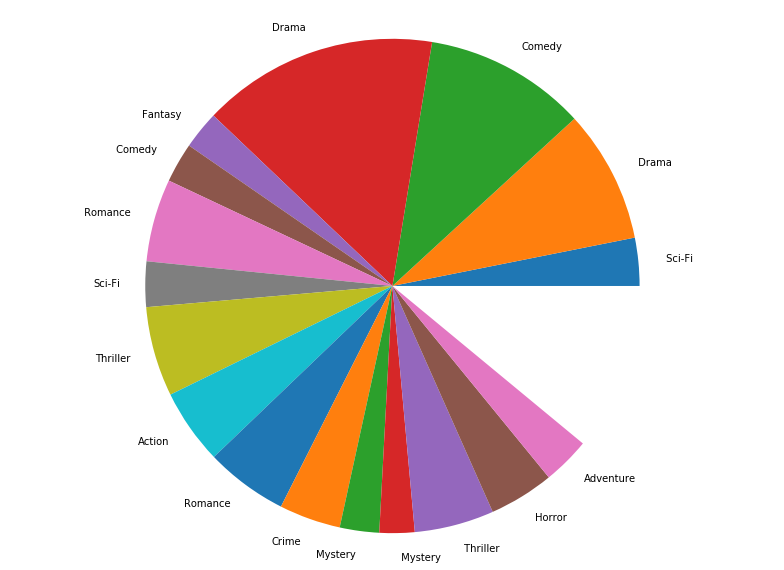

In [59]:
fig_pie,ax_pie = plt.subplots(figsize=(11,8))
plt.pie(data,radius=4.0,labels=labels)
plt.axis('equal')
plt.tight_layout()
plt.show()